# Problem Set 3:

## Question1:   (steps 1-3)

In [5]:
import numpy as np                     # np is the standard convention for numpy # steps1-3
import pandas as pd                    #pd is convention for pandas
column_type = ['user_id','age','gender','occupation','zip_code']
address = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users = pd.read_csv(address, sep='|', usecols = column_type)          # use of sep parameter

#### discovering mean age per occupation:

In [6]:
users.groupby(['occupation']).age.mean()                                #step4

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

### step5: male ratio per occupation

In [14]:
def  Male_ratio(gender):                     #defining function for calculation
    if  gender=='M' : 
        return  1 
    if  gender=='F' : 
        return  0     
users ['gender_M']  =  users['gender'].apply (Male_ratio)
requiredratio  =  users.groupby ('occupation' )[ 'gender_M' ].sum ()/users.occupation.value_counts() 
requiredratio.sort_values(ascending = False)        #sorting from most to least

doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64

## minimum age for each ocupation:(step6)

In [15]:
users.groupby(by = "occupation")["age"].min()                #using pandas dataframe .groupby function wih min() aggregation

occupation
administrator    21
artist           19
doctor           28
educator         23
engineer         22
entertainment    15
executive        22
healthcare       22
homemaker        20
lawyer           21
librarian        23
marketing        24
none             11
other            13
programmer       20
retired          51
salesman         18
scientist        23
student           7
technician       21
writer           18
Name: age, dtype: int64

## maximum age for each occupation:(step6)

In [16]:
users.groupby(by = "occupation")["age"].max()

occupation
administrator    70
artist           48
doctor           64
educator         63
engineer         70
entertainment    50
executive        69
healthcare       62
homemaker        50
lawyer           53
librarian        69
marketing        55
none             55
other            64
programmer       63
retired          73
salesman         66
scientist        55
student          42
technician       55
writer           60
Name: age, dtype: int64

### step7: for combination of occupation,sex, calculate mean age:

In [17]:
users.groupby(['occupation','gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

#### step8: calculation of male and female percentage per occupation

In [22]:
def MalePercent(gender):                #defining functions
    if  gender=='M' : 
        return  1 
    if  gender=='F' : 
        return  0     
def FemalePercent(gender): 
    if  gender=='M' : 
        return  0 
    if  gender=='F' : 
        return  1 
    
users ['m_percent']  =  users['gender'].apply (MalePercent)
users ['f_percent']  =  users['gender'].apply (FemalePercent)                 #formulas for calculation of percentage
MP =  users.groupby ('occupation' )[ 'm_percent' ].sum ()/users.occupation.value_counts() * 100
FP =  users.groupby ('occupation' )[ 'f_percent' ].sum ()/users.occupation.value_counts() * 100

m_percent_def = pd.DataFrame(MP)                                             #creating dataframe
f_percent_def = pd.DataFrame(FP)

m_percent_def.columns = ['percent']
f_percent_def.columns = ['percent']

m_percent_def.merge(f_percent_def)
frame = [m_percent_def,f_percent_def]

result = pd.concat(frame,axis=1)
result.columns = ['m_percent', 'f_percent']
result

,m_percent,f_percent
administrator,54.430380,45.569620
artist,53.571429,46.428571
doctor,100.000000,0.000000
educator,72.631579,27.368421
engineer,97.014925,2.985075
entertainment,88.888889,11.111111
executive,90.625000,9.375000
healthcare,31.250000,68.750000
homemaker,14.285714,85.714286
lawyer,83.333333,16.666667


## question 2:

In [24]:
import numpy as np                     # np is the standard convention for numpy # steps1-3
import pandas as pd
address2 = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(address2)                        

In [26]:
Goals = euro12['Goals']                                   #step-4
print (Goals)                                      ## can also write" euro12.Goals " to select only goals column

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


##### Number of teams participated in Euro2012:                          #step 5

In [30]:
print('A total of ',euro12.Team.count(),'Teams participated in Euro2012')

A total of  16 Teams participated in Euro2012


##### number of columns in dataset (step-6) :

In [28]:
print('There are',len(euro12.columns),'columns in the dataset euro12')

There are 35 columns in the dataset euro12


###### step 7:

In [29]:
discipline = euro12[['Team', 'Yellow Cards','Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


#### Sort the teams by Red Cards, then to Yellow Cards (step-8)

In [32]:
discipline.sort_values(['Red Cards','Yellow Cards'])

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


##### Calculate the mean Yellow Cards given per Team: step-9


In [33]:
discipline['Yellow Cards'].mean()

7.4375

In [35]:
euro12.columns = euro12.columns.str.replace(' ', '')
pd.DataFrame(euro12.groupby(['Team']).YellowCards.mean())

,YellowCards
Team,
Croatia,9
Czech Republic,7
Denmark,4
England,5
France,6
Germany,4
Greece,9
Italy,16
Netherlands,5


### Filter teams that scored more than 6 goals step10:

In [37]:
euro12[euro12.Goals > 6]

,Team,Goals,Shotsontarget,Shotsofftarget,ShootingAccuracy,%Goals-to-shots,Totalshots(inc.Blocked),HitWoodwork,Penaltygoals,Penaltiesnotscored,...,Savesmade,Saves-to-shotsratio,FoulsWon,FoulsConceded,Offsides,YellowCards,RedCards,Subson,Subsoff,PlayersUsed
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


##### step 11: select teams that start with G:

In [38]:
euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shotsontarget,Shotsofftarget,ShootingAccuracy,%Goals-to-shots,Totalshots(inc.Blocked),HitWoodwork,Penaltygoals,Penaltiesnotscored,...,Savesmade,Saves-to-shotsratio,FoulsWon,FoulsConceded,Offsides,YellowCards,RedCards,Subson,Subsoff,PlayersUsed
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


##### Step 12. Select the first 7 columns

In [39]:
euro12.iloc[:, :7]                            ##iloc is used to select based on index

,Team,Goals,Shotsontarget,Shotsofftarget,ShootingAccuracy,%Goals-to-shots,Totalshots(inc.Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


#### step13- select all columns except last three

In [40]:
euro12.iloc[:, :-3]

,Team,Goals,Shotsontarget,Shotsofftarget,ShootingAccuracy,%Goals-to-shots,Totalshots(inc.Blocked),HitWoodwork,Penaltygoals,Penaltiesnotscored,...,CleanSheets,Blocks,Goalsconceded,Savesmade,Saves-to-shotsratio,FoulsWon,FoulsConceded,Offsides,YellowCards,RedCards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


#### Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [48]:
euro12.set_index('Team', inplace = True)

NameError: name 'Team' is not defined

In [43]:
euro12.loc[['England','Italy','Russia'], 'Shooting Accuracy']

KeyError: 'Shooting Accuracy'

In [46]:
S14= euro12[(euro12.Team == 'England') | (euro12.Team == 'Italy') | (euro12.Team == 'Russia')]

pd.DataFrame(S14[['Team','ShootingAccuracy']])

AttributeError: 'DataFrame' object has no attribute 'Team'

## Question 3:

In [52]:
import pandas as pd
import numpy as np
import random 

Series_1 = np.random.randint(1,4,size=(100))            ##this selects the random integer     
Series_2 = np.random.randint(1,3,size=(100))
Series_3 = np.random.randint(10000,30000,size=(100))

Series1 = pd.Series(data=Series_1)
Series2 = pd.Series(data=Series_2)
Series3 = pd.Series(data=Series_3)

In [56]:
columns = {"bedrs": Series1,
        "bathrs": Series2,                                            #it shows 0-299
        "price_sqr_meter": Series3}

fn1 = pd.concat(columns,
               axis = 1)
fn2 = pd.concat(columns,
               axis = 0)

fn2.reset_index(drop=True, inplace=True)

pd.DataFrame(fn2)

,0
0,1
1,3
2,3
3,1
4,1
...,...
295,24335
296,19056
297,17232
298,10968


## Question4

In [62]:
import pandas as pd        ##STEP1
import numpy as np

In [67]:
df = pd.read_csv("wind.txt", sep='\s+',parse_dates= {"DateTime" : ["Yr","Mo","Dy"]})          ##step2

##### step 3. assign it to variable called data and replace first 3 columns by proper datetime index

In [68]:
data =df

In [69]:
df["DateTime"] = np.where(pd.DatetimeIndex(df["DateTime"]).year < 2000,df.DateTime,df.DateTime - pd.offsets.DateOffset(years=100))
df
indexed_data = df.set_index("DateTime")                            ##step5
indexed_data.index.astype("datetime64[ns]")
indexed_data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
DateTime,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


#### step6

In [70]:
df.isna().sum()

DateTime    0
RPT         6
VAL         3
ROS         2
KIL         5
SHA         2
BIR         0
DUB         3
CLA         2
MUL         3
CLO         1
BEL         0
MAL         4
dtype: int64

#### step7 : non missing values

In [73]:
print("Total number of non-missing values are :",indexed_data.count().sum())

Total number of non-missing values are : 78857


####  step 8:  Calculate the mean windspeeds of the windspeeds over all the locations and all the times.


In [74]:
ws = df.loc[:, 'RPT':'MAL']

In [75]:
ws.mean(0).mean()            ##this gives the mean of winds at all locations

10.227982360836924

##### step 9  Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the daysA different set of numbers for each location

In [76]:
loc_stats = ws.describe()
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
25%,8.120000,6.670000,8.000000,3.580000,6.750000,4.000000,6.000000,5.090000,5.370000,5.330000,8.710000,10.710000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
75%,15.920000,14.040000,14.670000,8.420000,13.540000,9.670000,12.960000,11.420000,11.190000,11.630000,16.880000,19.830000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


#### STEP 10
Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.A different set of numbers for each day

In [79]:
day_stats = indexed_data.head().T.describe()
day_stats

DateTime,1961-01-01,1961-01-02,1961-01-03,1961-01-04,1961-01-05
count,11.000000,11.000000,11.000000,12.000000,12.000000
mean,13.018182,11.336364,11.641818,6.619167,10.630000
std,2.808875,3.188994,3.681912,3.198126,2.445356
min,9.290000,6.500000,6.170000,1.790000,6.170000
25%,10.540000,9.730000,9.315000,4.570000,9.807500
50%,13.170000,10.830000,11.250000,5.855000,11.170000
75%,15.000000,13.225000,12.730000,9.117500,12.170000
max,18.500000,17.540000,18.500000,11.750000,13.330000


#### step11 
. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.


In [83]:
jan_data = indexed_data[indexed_data.index.month == 1]
print ("January windspeeds:")
print (jan_data.mean())

January windspeeds:
RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64


#### Step 12. Downsample the record to a yearly frequency for each location

In [86]:
indexed_data.resample('A').mean()


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
DateTime,,,,,,,,,,,,
1961-12-31,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-12-31,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


#### Step 13. Downsample the record to a monthly frequency for each location.

In [87]:
indexed_data.resample('M').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
DateTime,,,,,,,,,,,,
1961-01-31,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02-28,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03-31,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-30,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-31,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


##### step 14 Step 14. Downsample the record to a weekly frequency for each location

In [88]:
indexed_data.resample('W').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
DateTime,,,,,,,,,,,,
1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


#### step 15 
Calculate the min, max and mean windspeeds and standard deviations of the 
windspeeds across all locations for each week (assume that the first week starts on 
January 2 1961) for the first 52 weeks.


In [89]:
indexed_data.agg(['min','max','mean','std'])

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


# Question 5

In [91]:
import pandas as pd                         ##steps 1-3
import numpy as np
coltype = ['order_id','quantity','item_name','choice_description','item_price']
address3 = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(address3, sep = '\t',usecols= coltype)
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


###### step 4 see the first 10 entries

In [92]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


###### step 5

In [93]:
chipo.shape[0]
print( 'number of observations in the dataset are',chipo.shape[0])

number of observations in the dataset are 4622


###### step 6

In [94]:
chipo.shape[1]
print('number of columns in dataset are',chipo.shape[1])

number of columns in dataset are 5


##### step 7 print the name of all folders

In [95]:
print(chipo.columns)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


###### step 8

In [96]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

###### step 9

In [97]:
chipo.item_name.value_counts().head(1)

Chicken Bowl    726
Name: item_name, dtype: int64

##### Step 10. For the most-ordered item, how many items were ordered?

In [101]:
chipo.item_name.unique().shape[0]
print('it was ordered for times',chipo.item_name.unique().shape[0])

it was ordered for times 50


##### step 11

In [102]:
chipo.choice_description.value_counts().head()

[Diet Coke]                                                                          134
[Coke]                                                                               123
[Sprite]                                                                              77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                42
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]     40
Name: choice_description, dtype: int64

###### step 12

In [103]:
chipo.quantity.sum()

4972

In [ ]:
##### step 13

In [104]:
def lambdafn(x):
    return float(x[1:-1])

chipo.item_price = chipo.item_price.apply(lambdafn)
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


#### step 14

In [105]:
chipo.item_price.sum()

34500.16

##### step 15

chipo.tail()

In [106]:
chipo.tail()

,order_id,quantity,item_name,choice_description,item_price
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",8.75


In [ ]:
### step 16

In [107]:
avg_revenue = chipo.groupby(by=['order_id']).sum()
avg_revenue['quantity'].mean()

2.711014176663032

## Question 6:

In [109]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [111]:
df = pd.read_csv("us-marriages-divorces-1867-2014.csv")

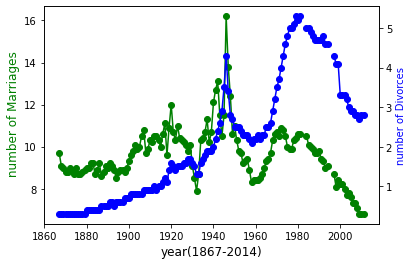

<Figure size 72000x72000 with 0 Axes>

In [113]:
fig,ax = plt.subplots()                                   ##making a plot

ax.plot(df['Year'], df['Marriages_per_1000'], color="green", marker="o")   # setting label for x-axis

ax.set_xlabel("year(1867-2014)",fontsize=12)                

ax.set_ylabel(" number of Marriages",color="green",fontsize=12)   # setting label for y-axis


                                             # this represents twin object for two diff y-axis on the sample plot
ax2=ax.twinx()

ax2.plot(df['Year'], df['Divorces_per_1000'],color="blue",marker="o")

ax2.set_ylabel("number of Divorces",color="blue",fontsize=10)

plt.figure(figsize=(1000,1000))
plt.show()

## Question 7:
Create a vertical bar chart comparing the number of marriages and divorces per 
capita in the U.S. between 1900, 1950, and 2000.

In [114]:
import numpy as np 
import matplotlib.pyplot as plt 

df = pd.read_csv("us-marriages-divorces-1867-2014.csv")

NameError: name 'Zd' is not defined

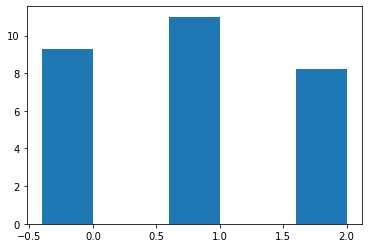

In [115]:
dff= df[(df.Year == 1900) | (df.Year == 1950) | (df.Year == 2000)]
X = dff['Year']
YM = dff['Marriages_per_1000']
ZD = dff['Divorces_per_1000']
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, YM, 0.4, label = 'Marriages per 1000')
plt.bar(X_axis + 0.2, Zd, 0.4, label = 'Divorces per 1000')
  
plt.xticks(X_axis, X)
plt.xlabel("Year of observation")
plt.ylabel("Number of marriages and divorces")
plt.title("Number")
plt.legend()
plt.show()

### Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort 
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!

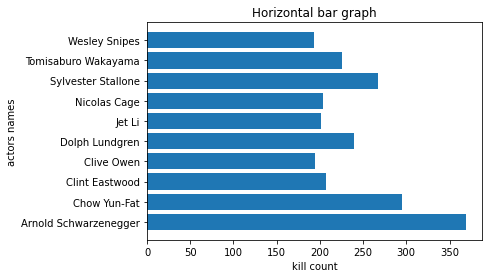

In [127]:
import numpy as np 
import matplotlib.pyplot as plt 

dfa = pd.read_csv("actor_kill_counts.csv")
df_sort = dfa.sort_values('Count')

y=dfa["Actor"]
x=dfa["Count"]

plt.barh(dfa.Actor,dfa.Count)
plt.ylabel("actors names")
plt.xlabel("kill count")
plt.title("Horizontal bar graph")
plt.show()

# question 9
Create a pie chart showing the fraction of all Roman Emperors that were 
assassinated.

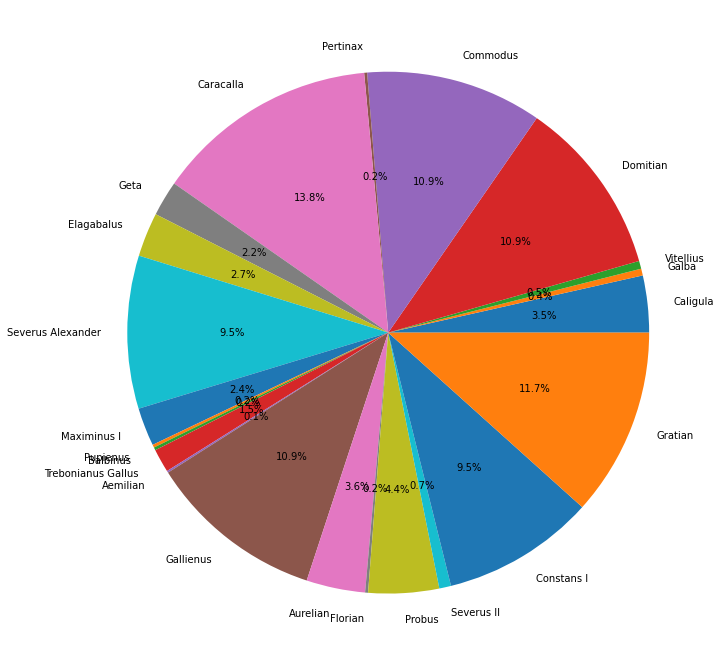

In [134]:
from matplotlib import pyplot as plt
import numpy as np

rmr = pd.read_csv("roman-emperor-reigns.csv")
rmr = rmr[(rmr.Cause_of_Death == 'Assassinated')] 
records = rmr['Length_of_Reign']

fig = plt.figure(figsize =(18, 12))               #plotting
plt.pie(records, labels = rmr['Emperor'], autopct='%2.1f%%')

plt.show()                             ## for showing the resulting plot

# question 10 : scatter plot
Create a scatter plot showing the relationship between the total revenue earned by 
arcades and the number of Computer Science PhDs awarded in the U.S. between 
2000 and 2009.


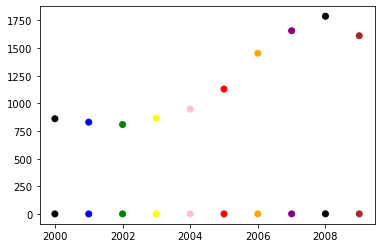

In [138]:
import numpy as np 
import matplotlib.pyplot as plt 

dfr = pd.read_csv("arcade-revenue-vs-cs-doctorates.csv")
x = dfr['Year']
y = dfr['Total Arcade Revenue (billions)']
colors = np.array(["black","blue","green","yellow","pink","red","orange","purple","black","brown"])
plt.scatter(x, y,c=colors)

y = dfr['Computer Science Doctorates Awarded (US)']
plt.scatter(x, y,c=colors)
plt.show()
